In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
from datetime import datetime, timedelta
from neuralprophet import NeuralProphet
import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")

In [2]:
# Step 1: Read data from JSON file
def read_json(file_path):
    with open(file_path, 'r') as f:
        data = json.load(f)
    return data['Weekly Time Series']

file_path = 'IBM_weekly.json'
stock_data = read_json(file_path)


In [3]:
stock_data

{'2024-02-16': {'1. open': '185.9000',
  '2. high': '188.9500',
  '3. low': '182.2600',
  '4. close': '187.6400',
  '5. volume': '21745006'},
 '2024-02-09': {'1. open': '185.5100',
  '2. high': '187.1800',
  '3. low': '181.4900',
  '4. close': '186.3400',
  '5. volume': '22784812'},
 '2024-02-02': {'1. open': '187.4600',
  '2. high': '189.4600',
  '3. low': '182.7100',
  '4. close': '185.7900',
  '5. volume': '28283876'},
 '2024-01-26': {'1. open': '172.8200',
  '2. high': '196.9000',
  '3. low': '172.4000',
  '4. close': '187.4200',
  '5. volume': '56232762'},
 '2024-01-19': {'1. open': '165.8000',
  '2. high': '171.5791',
  '3. low': '165.0400',
  '4. close': '171.4800',
  '5. volume': '19864308'},
 '2024-01-12': {'1. open': '158.6900',
  '2. high': '165.9800',
  '3. low': '157.8850',
  '4. close': '165.8000',
  '5. volume': '17643392'},
 '2024-01-05': {'1. open': '162.8300',
  '2. high': '163.2900',
  '3. low': '158.6700',
  '4. close': '159.1600',
  '5. volume': '14822074'},
 '2023

In [4]:
# Convert data to DataFrame
df = pd.DataFrame.from_dict(stock_data)

In [5]:
df.head()

,2024-02-16,2024-02-09,2024-02-02,2024-01-26,2024-01-19,2024-01-12,2024-01-05,2023-12-29,2023-12-22,2023-12-15,...,2000-01-14,2000-01-07,1999-12-31,1999-12-23,1999-12-17,1999-12-10,1999-12-03,1999-11-26,1999-11-19,1999-11-12
1. open,185.9000,185.5100,187.4600,172.8200,165.8000,158.6900,162.8300,162.2300,162.2300,162.6800,...,117.2500,112.4400,109.6900,109.0600,108.1200,113.0000,104.9400,105.5000,96.0000,90.5000
2. high,188.9500,187.1800,189.4600,196.9000,171.5791,165.9800,163.2900,164.1800,163.3300,166.3400,...,123.3100,119.7500,110.7500,110.4400,112.7500,122.1200,112.8700,109.8700,105.1200,97.5000
3. low,182.2600,181.4900,182.7100,172.4000,165.0400,157.8850,158.6700,162.0500,159.5300,160.1490,...,115.3700,110.6200,106.6200,107.7500,104.5000,107.5600,102.1200,101.8100,92.6200,90.5000
4. close,187.6400,186.3400,185.7900,187.4200,171.4800,165.8000,159.1600,163.5500,162.1400,162.2300,...,119.6200,113.5000,107.8700,108.6200,110.0000,109.0000,111.8700,105.0000,103.9400,95.8700
5. volume,21745006,22784812,28283876,56232762,19864308,17643392,14822074,9376537,17686398,33504550,...,42663900,51137300,16812500,18144100,38810100,58626000,37670000,37165600,61550800,43569700


In [6]:
# df = pd.read_json('IBM_weekly.json')

In [7]:
transposed_df = df.transpose()

In [8]:
transposed_df.head()

,1. open,2. high,3. low,4. close,5. volume
2024-02-16,185.9000,188.9500,182.2600,187.6400,21745006
2024-02-09,185.5100,187.1800,181.4900,186.3400,22784812
2024-02-02,187.4600,189.4600,182.7100,185.7900,28283876
2024-01-26,172.8200,196.9000,172.4000,187.4200,56232762
2024-01-19,165.8000,171.5791,165.0400,171.4800,19864308


In [9]:
transposed_df.columns = [col.split('. ')[1] for col in transposed_df.columns]
transposed_df.head()

,open,high,low,close,volume
2024-02-16,185.9000,188.9500,182.2600,187.6400,21745006
2024-02-09,185.5100,187.1800,181.4900,186.3400,22784812
2024-02-02,187.4600,189.4600,182.7100,185.7900,28283876
2024-01-26,172.8200,196.9000,172.4000,187.4200,56232762
2024-01-19,165.8000,171.5791,165.0400,171.4800,19864308


In [10]:
transposed_df.shape

(1267, 5)

In [11]:
transposed_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1267 entries, 2024-02-16 to 1999-11-12
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   open    1267 non-null   object
 1   high    1267 non-null   object
 2   low     1267 non-null   object
 3   close   1267 non-null   object
 4   volume  1267 non-null   object
dtypes: object(5)
memory usage: 91.7+ KB


In [12]:
transposed_df = transposed_df.astype('float64')

In [13]:
transposed_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1267 entries, 2024-02-16 to 1999-11-12
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    1267 non-null   float64
 1   high    1267 non-null   float64
 2   low     1267 non-null   float64
 3   close   1267 non-null   float64
 4   volume  1267 non-null   float64
dtypes: float64(5)
memory usage: 91.7+ KB


In [14]:
transposed_df.describe()

,open,high,low,close,volume
count,1267.000000,1267.000000,1267.000000,1267.000000,1.267000e+03
mean,129.962725,132.903608,127.195652,130.094921,2.867803e+07
std,35.406040,35.594915,35.165533,35.429451,1.316037e+07
min,56.600000,62.000000,54.010000,56.600000,7.770697e+06
25%,99.860000,103.150000,97.390000,100.100000,1.901445e+07
50%,127.690000,130.570000,125.010000,127.880000,2.546723e+07
75%,152.940000,155.652500,150.650000,152.915000,3.499665e+07
max,212.900000,215.900000,210.110000,214.920000,1.108978e+08


In [15]:
transposed_df['ds'] = pd.to_datetime(transposed_df.index)
transposed_df = transposed_df.rename(columns={'volume': 'y'})

In [16]:
transposed_df.head()

,open,high,low,close,y,ds
2024-02-16,185.90,188.9500,182.26,187.64,21745006.0,2024-02-16
2024-02-09,185.51,187.1800,181.49,186.34,22784812.0,2024-02-09
2024-02-02,187.46,189.4600,182.71,185.79,28283876.0,2024-02-02
2024-01-26,172.82,196.9000,172.40,187.42,56232762.0,2024-01-26
2024-01-19,165.80,171.5791,165.04,171.48,19864308.0,2024-01-19


In [17]:
data = transposed_df[['ds', 'y']]

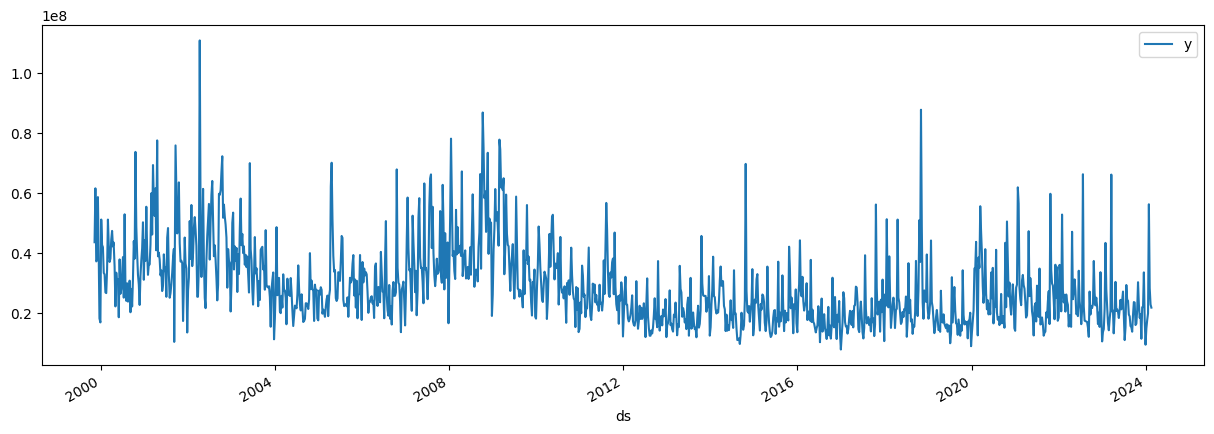

In [18]:
plt = data.plot(x="ds", y="y", figsize=(15, 5))

In [19]:
# Step 3: Train the model
model = NeuralProphet()
metrics = model.fit(data, freq='W')

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency -1W-FRI corresponds to 93.765% of the data.
WARNING - (NP.df_utils._infer_frequency) - Defined frequency W is different than major frequency -1W-FRI
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 110
WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (40) is too small than the required number                     for the learning rate finder (228). The results might not be optimal.


Finding best initial lr:   0%|          | 0/228 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

In [20]:
metrics

,MAE,RMSE,Loss,RegLoss,epoch
0,33491882.0,40933112.0,0.418006,0.0,0
1,25517172.0,31559020.0,0.294154,0.0,1
2,18518508.0,23574398.0,0.191231,0.0,2
3,12696833.0,16846244.0,0.111716,0.0,3
4,9394438.0,12961568.0,0.069016,0.0,4
...,...,...,...,...,...
105,6918239.0,9564254.0,0.041358,0.0,105
106,6898565.5,9628002.0,0.041354,0.0,106
107,6916093.0,9618145.0,0.041760,0.0,107
108,6895753.0,9525647.0,0.041218,0.0,108


In [21]:
# Use static plotly in notebooks
model.set_plotting_backend("plotly-static")

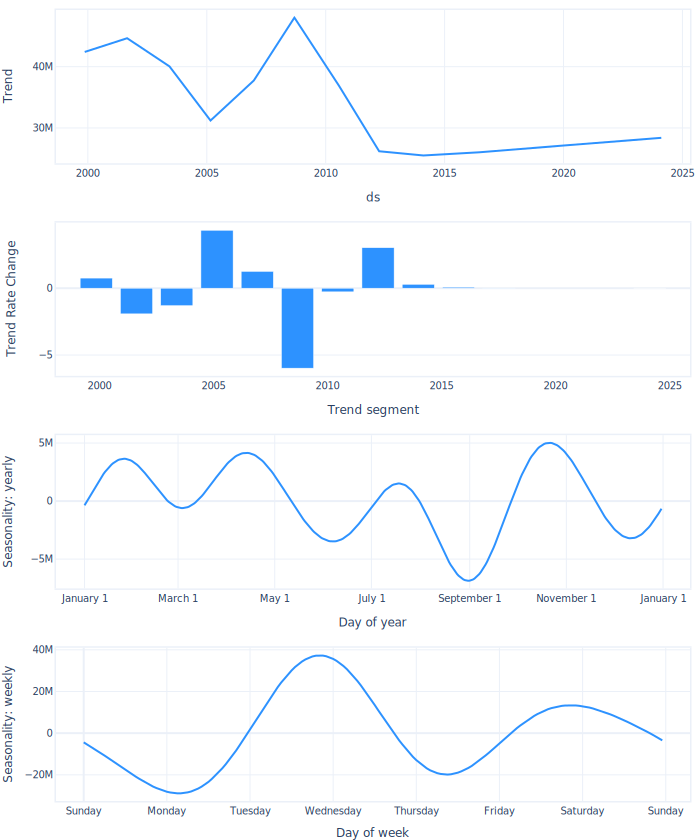

In [22]:
model.plot_parameters()

In [35]:
# Step 4: Make predictions for the next week
future = model.make_future_dataframe(data, periods=7, n_historic_predictions=True)
forecast = model.predict(future)
next_week_forecast = forecast.tail(7)

INFO - (NP.df_utils._infer_frequency) - Major frequency -1W-FRI corresponds to 93.765% of the data.
WARNING - (NP.df_utils._infer_frequency) - Defined frequency W is different than major frequency -1W-FRI


INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency -1W-FRI corresponds to 93.25% of the data.
WARNING - (NP.df_utils._infer_frequency) - Defined frequency W is different than major frequency -1W-FRI
INFO - (NP.df_utils._infer_frequency) - Major frequency -1W-FRI corresponds to 93.25% of the data.
WARNING - (NP.df_utils._infer_frequency) - Defined frequency W is different than major frequency -1W-FRI
INFO - (NP.data.processing._handle_missing_data) - Dropped 7 rows at the end with NaNs in 'y' column.


Predicting: 40it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


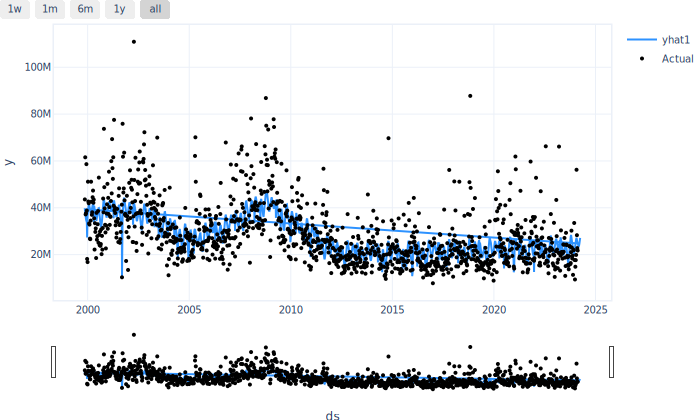

In [36]:
model.plot(forecast)

In [37]:
# Step 5: Output the predictions
next_week_start_date = next_week_forecast['ds'].iloc[0] + timedelta(days=1)
next_week_end_date = next_week_forecast['ds'].iloc[0] + timedelta(days=7)
next_week_prediction = next_week_forecast[['ds', 'yhat1']].rename(columns={'yhat1': 'prediction'})
next_week_prediction['ds'] = next_week_prediction['ds'].dt.strftime('%Y-%m-%d')

print("Next week predictions:")
print(next_week_prediction)

Next week predictions:
              ds  prediction
1267  2024-02-18  24790496.0
1268  2024-02-25  23816402.0
1269  2024-03-03  23427076.0
1270  2024-03-10  23728740.0
1271  2024-03-17  24648924.0
1272  2024-03-24  25926080.0
1273  2024-03-31  27130640.0
